# Task 4 : Data Collection in the Wild

In [2]:
import pandas as pd             #type: ignore
import numpy as np              #type: ignore
import matplotlib.pyplot as plt         #type: ignore
import seaborn as sns                   #type: ignore
from sklearn.preprocessing import StandardScaler       #type: ignore
from sklearn.model_selection import train_test_split   #type: ignore
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# importing the personal HAR dataset
file_path = './/HAR//Personal_HAR_datasets'

X_my = pd.read_csv(os.path.join(file_path, 'combined_X_data.csv'), delimiter=',', header=None)
y_my = pd.read_csv(os.path.join(file_path, 'combined_y_data.csv'), delimiter=',', header=None)

X_my.drop(0, axis= 0, inplace= True)
y_my.drop(0, axis= 0, inplace= True)

X_my = np.array(X_my)
y_my= np.array(y_my)

print("X_my.shape: ", X_my.shape)
print("y_my.shape: ", y_my.shape)

X_my.shape:  (8500, 3)
y_my.shape:  (17, 1)


In [4]:
# importing the UCI HAR dataset
X = pd.read_csv('data_X.csv', delimiter=",", header=None)
y = pd.read_csv('data_y.csv', delimiter=",", header=None)

X = np.array(X)
y = np.array(y)

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (90000, 3)
y.shape:  (180, 1)


Ques 1: Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a. Raw data from accelerometer, b. TSFEL featurised data, c. Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

In [6]:
# we have 180 time series which are stored a flatten arrays, This is done for sklearn dtree implementation

X_comb= []           # Combined dataset
for i in range(len(X)//500):
    X_comb.append(X[i*500: (i+1)*500, :].flatten())
X_comb = np.array(X_comb)

print("X_commb.shape: ", X_comb.shape)
print("y.shape: ", y.shape)

X_commb.shape:  (180, 1500)
y.shape:  (180, 1)


In [8]:
X_my_comb= []           # Combined dataset
for i in range(len(X_my)//500):
    X_my_comb.append(X_my[i*500: (i+1)*500, :].flatten())
X_my_comb = np.array(X_my_comb)

print("X_my_comb.shape: ", X_my_comb.shape)
print("y_my.shape: ", y_my.shape)

X_my_comb.shape:  (17, 1500)
y_my.shape:  (17, 1)


decision tree model using raw accelerometer data: 

Accuracy:  0.24

Weighted precisiion:  0.82

Weighted recall:  0.24



c:\Users\ADITI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


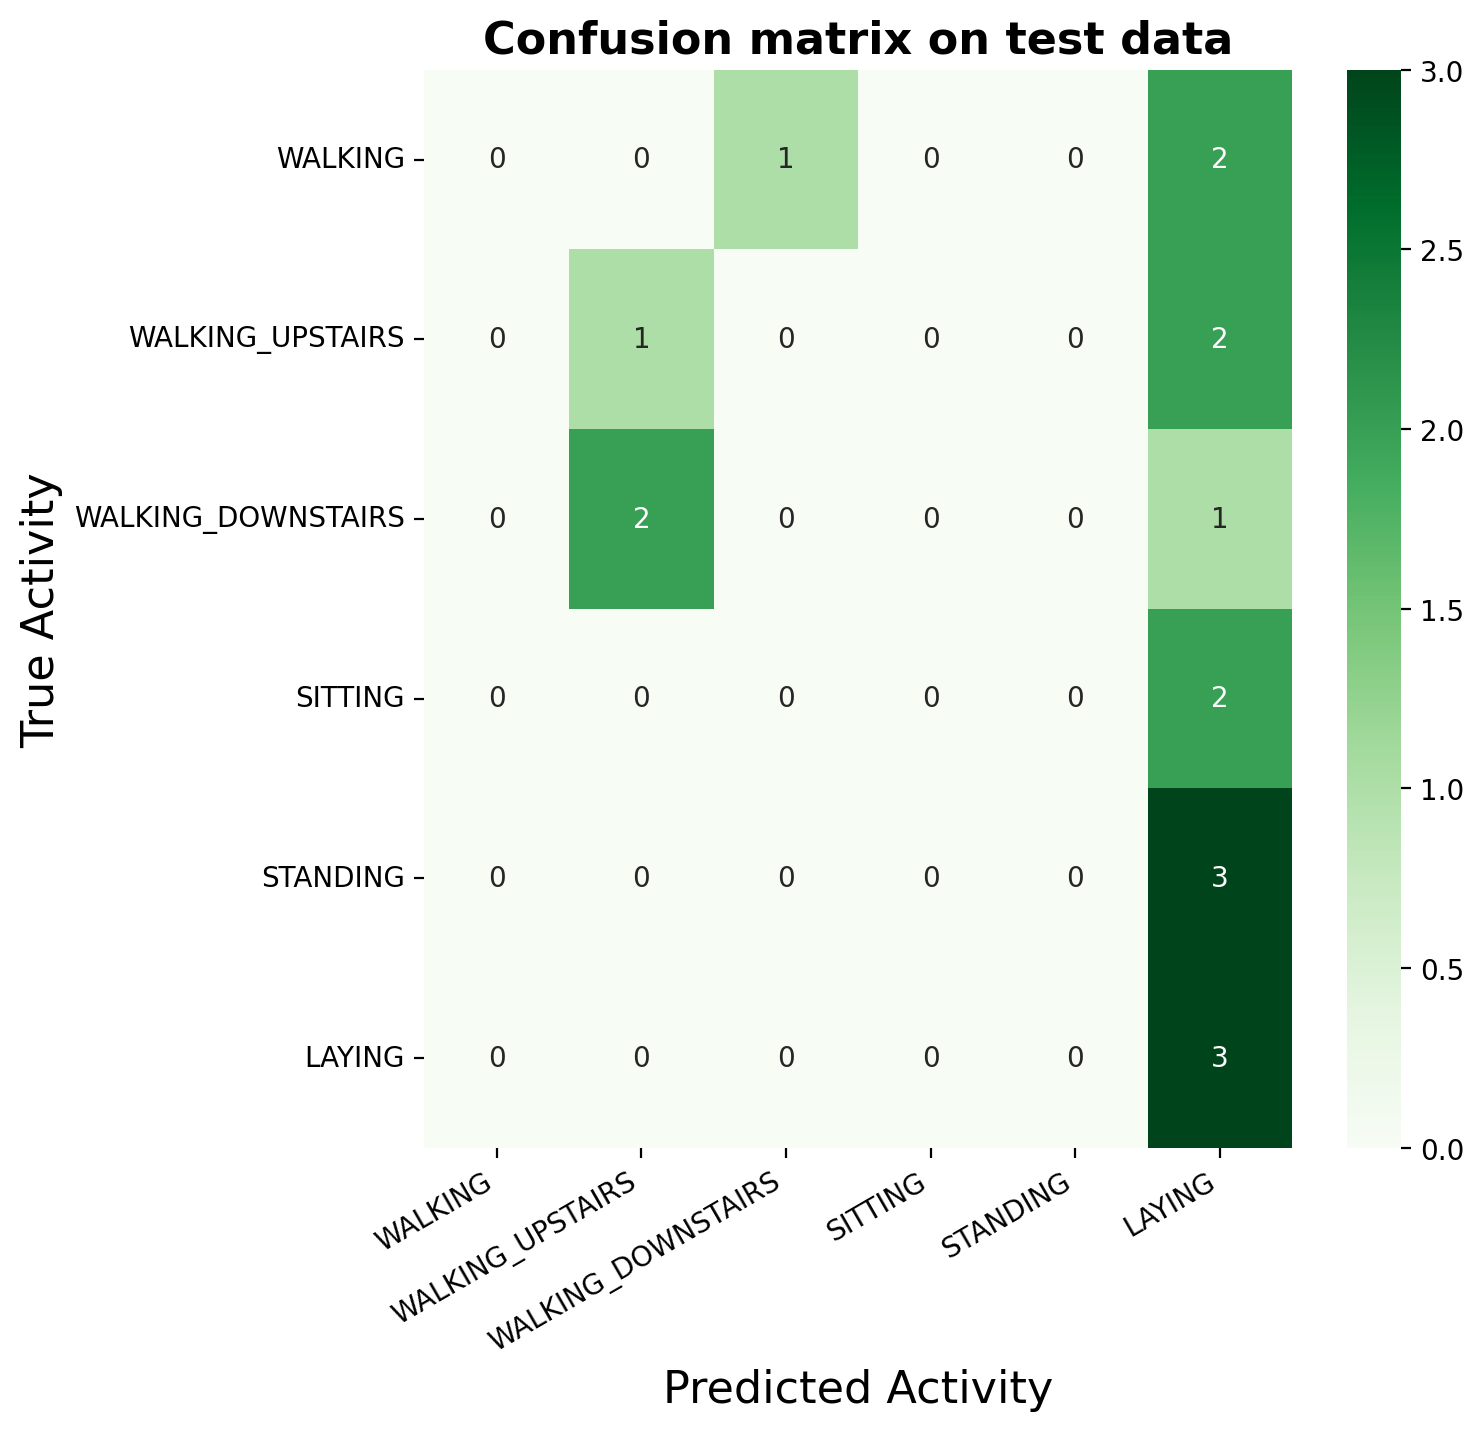

In [10]:
# training the model on UCI HAR dataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix       
from sklearn.tree import DecisionTreeClassifier    

print("decision tree model using raw accelerometer data: \n")
dtmodel= DecisionTreeClassifier(random_state=0)

dtmodel.fit(X_comb, y)

y_pred= dtmodel.predict(X_my_comb)                 # a row vector numpy array

print("Accuracy: ", f"{accuracy_score(y_pred, y_my):.2f}\n")
print("Weighted precisiion: ", f"{precision_score(y_pred, y_my, average='weighted'):.2f}\n")
print("Weighted recall: ", f"{recall_score(y_pred, y_my, average='weighted'):.2f}\n")

confusion_mtx= confusion_matrix(y_my, y_pred)
# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize=(7,7))
sns.heatmap(confusion_mtx,annot=True, fmt= 'd', cmap= 'Greens', cbar= 'False', xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")

Ques 2 : Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?

In [12]:
import tsfel

ts = tsfel.get_features_by_domain()
X_tsfel = tsfel.time_series_features_extractor(ts, X_my, fs=50, window_size=500)

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_tsfel, y_my, test_size=0.3, random_state=0)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
X_train.shape:  (11, 1152)
X_test.shape:  (6, 1152)


c:\Users\ADITI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


decision tree model using features obtained by TSFEL: 

Accuracy:  0.50

Weighted Average Precision:  0.42

Weighted Average Recall:  0.500000



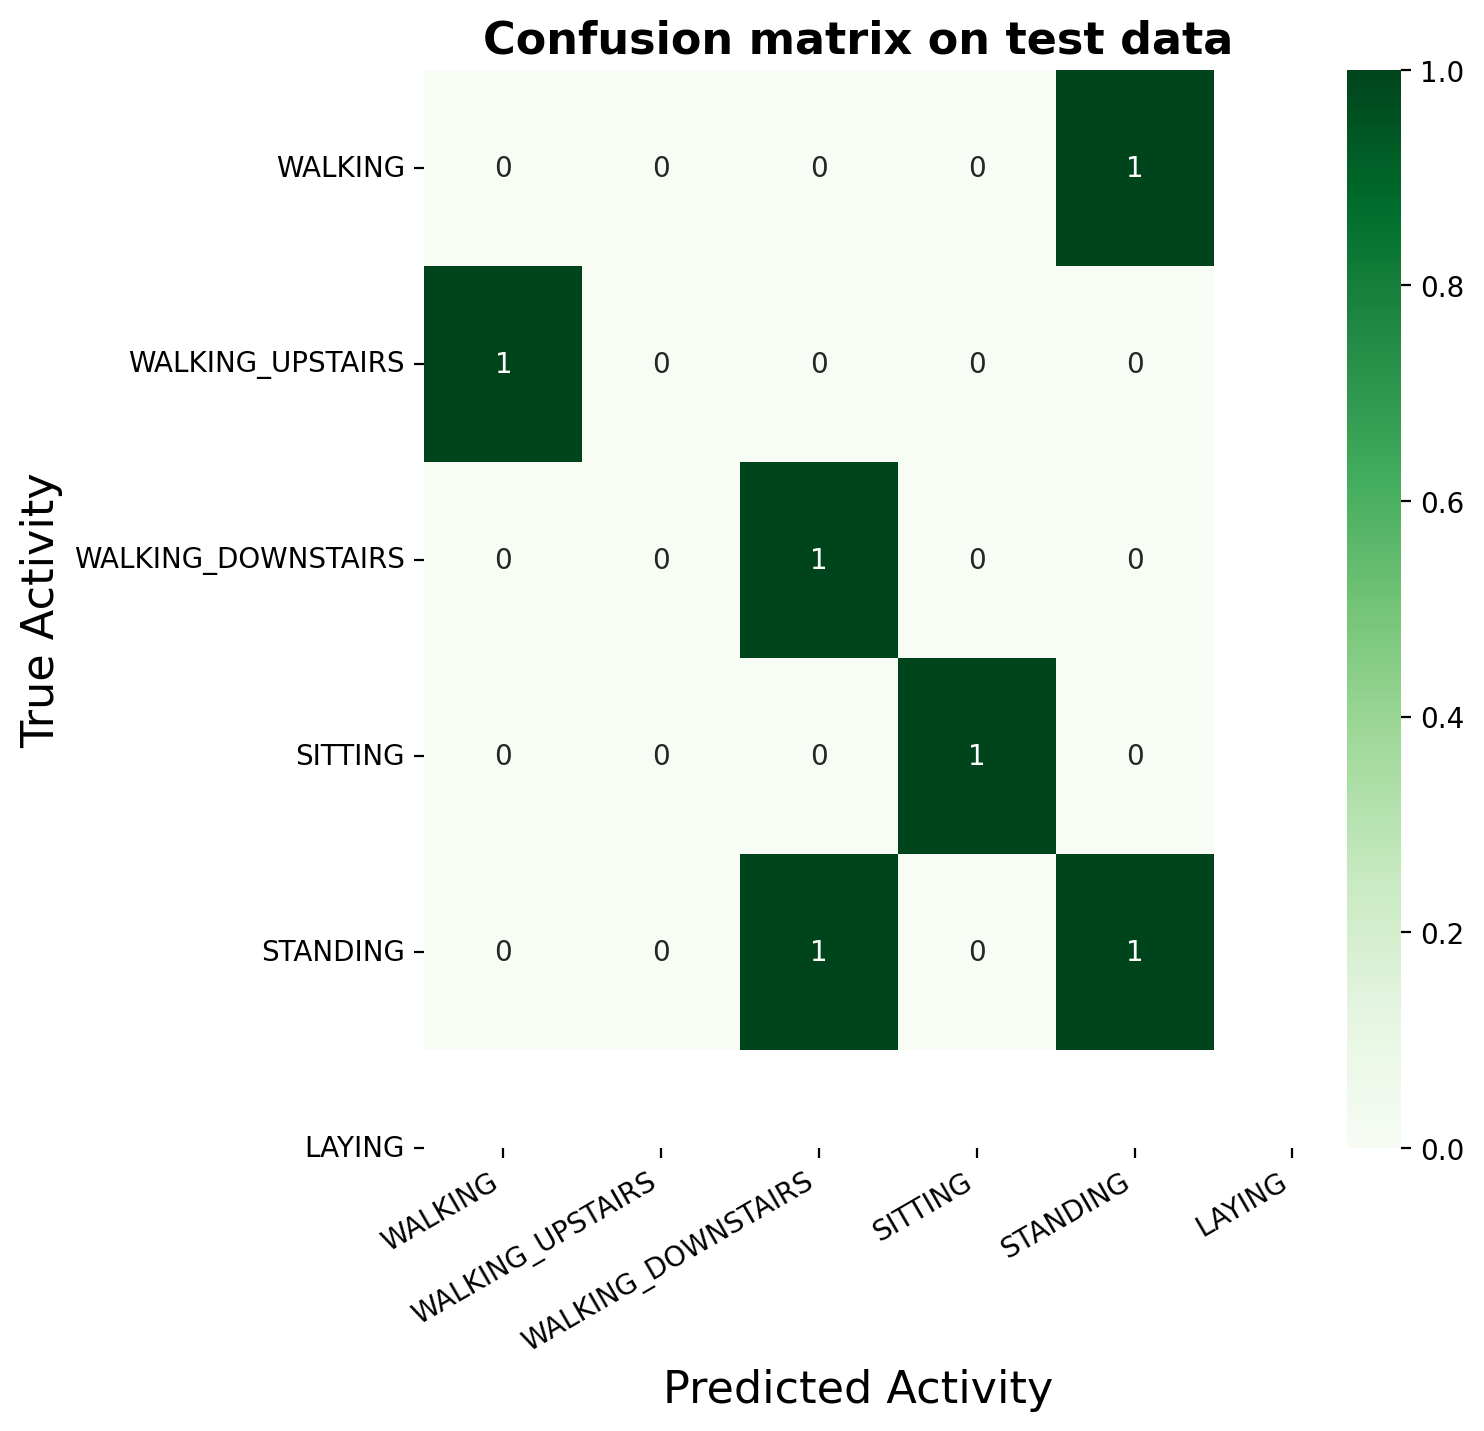

In [13]:
dtmodel= DecisionTreeClassifier(random_state=0)

dtmodel.fit(X_train, y_train)

y_pred= dtmodel.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)

precision= precision_score(y_test, y_pred, average='weighted')

recall= recall_score(y_test, y_pred, average='weighted')

confusion_mtx= confusion_matrix(y_test, y_pred)

print("decision tree model using features obtained by TSFEL: \n")

print("Accuracy: ", f"{accuracy:.2f}\n")

print("Weighted Average Precision: ", f"{precision:.2f}\n")

print("Weighted Average Recall: ", f"{recall:2f}\n")

# Plot the confusion matrix
activity_code = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

plt.figure(figsize=(7,7))
sns.heatmap(confusion_mtx,annot=True,cmap="Greens",fmt="d",cbar= 'False', xticklabels=activity_code.keys(), yticklabels=activity_code.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")